In [ ]:
TASK 4

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [20]:
data = pd.read_csv(r'C:\Users\avinash\OneDrive\Desktop\jupyter projects\bank+marketing (1)\bank\bank-full.csv', sep=';')

In [21]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


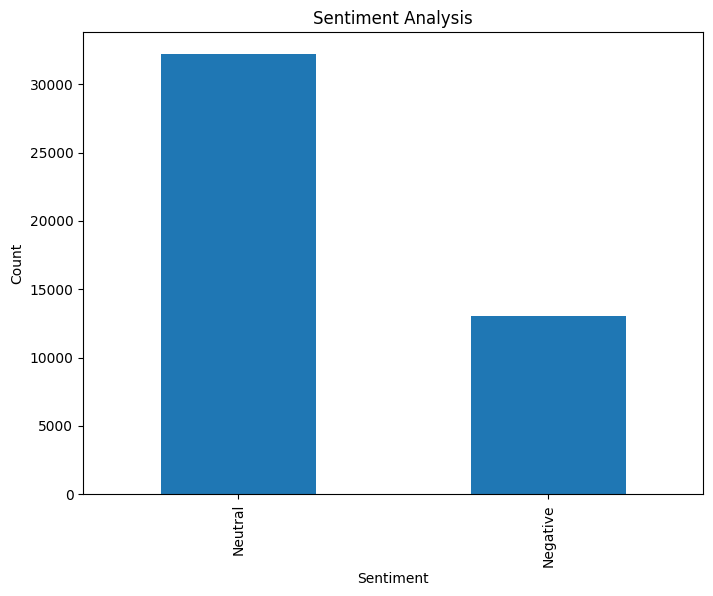

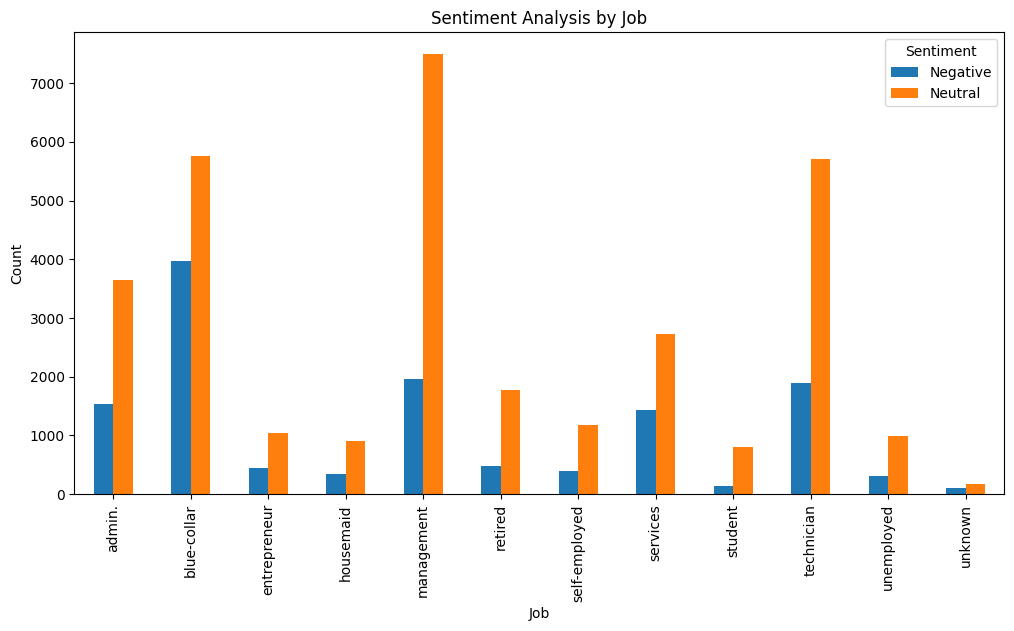

In [23]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['contact'].apply(analyze_sentiment)

plt.figure(figsize=(8, 6))
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

job_sentiment = data.groupby(['job', 'Sentiment']).size().reset_index(name='Count')
job_sentiment = job_sentiment.pivot(index='job', columns='Sentiment', values='Count').fillna(0)
job_sentiment.plot(kind='bar', figsize=(12, 6))
plt.title('Sentiment Analysis by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()